In [34]:
import polars as pl
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
%run utils.ipynb

In [35]:
dos_df_path,fuzzy_df_path,attack_free_df_path=load_data_paths_from_config_to_notebooks("out_paths")

In [36]:
dos_df_pl = pl.read_csv(dos_df_path)
fuzzy_df_pl= pl.read_csv(fuzzy_df_path)
attack_free_df_pl= pl.read_csv(attack_free_df_path)

In [37]:
def convert_pl_to_pd(df):
    return df.to_pandas()

In [38]:
def convert_multiple_pls_to_pds(dfs):
    return [convert_pl_to_pd(df)  for df in dfs]

In [39]:
dos_df_pd,fuzzy_df_pd,attack_free_df_pd=convert_multiple_pls_to_pds([dos_df_pl,fuzzy_df_pl,attack_free_df_pl])

In [40]:
def return_injected_messages_from_dfs(dfs):
    return [df[df["updatedFlag"]==1] for df in dfs]


In [41]:
def return_normal_messages_from_dfs(dfs):
    return [df[df["updatedFlag"]==0] for df in dfs]


In [42]:
attack_free_in_dos,attack_free_in_fuzzy=return_normal_messages_from_dfs([dos_df_pd,fuzzy_df_pd])
dos_df,fuzzy_df=return_injected_messages_from_dfs([dos_df_pd,fuzzy_df_pd])
attack_free_df=pd.concat([attack_free_df_pd,attack_free_in_dos,attack_free_in_fuzzy])

In [43]:
dos_df["attackType"]=1
fuzzy_df["attackType"]=2
attack_free_df["attackType"]=0


C:\Users\Naz\AppData\Local\Temp\ipykernel_3228\2067426196.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dos_df["attackType"]=1
C:\Users\Naz\AppData\Local\Temp\ipykernel_3228\2067426196.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fuzzy_df["attackType"]=2


## Common Methods

In [44]:
def plot_bar_plot(df, column_names):
    if len(column_names) != 2:
        raise ValueError("`column_names` must contain exactly two elements: [x_column, y_column].")
    
    plt.figure(figsize=(12, 6)) 
    
    sns.barplot(x=column_names[0], y=column_names[1], data=df, palette="viridis")

    plt.xlabel(column_names[0], fontsize=14)
    plt.ylabel(column_names[1], fontsize=14)
    plt.title(f"{column_names[0]}-{column_names[1]}", fontsize=16)
    plt.xticks(rotation=45, fontsize=12)
    plt.yticks(fontsize=12)

    plt.tight_layout()
    plt.show()


In [45]:
def plot_count_chart(df,column_name):
    plt.figure(figsize=(10,8))
    
    sns.countplot(x=column_name, data=df, palette='viridis')
    
    plt.title(f'Distribution of {column_name}')
    plt.xlabel(column_name)
    plt.ylabel('Frequency')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

In [46]:
def plot_bar_chart_of_percentages(df,column_name):
    counts = Counter(df[column_name])
    categories = list(counts.keys())
    values = list(counts.values())
    
    total = sum(values)
    percentages = [value / total * 100 for value in values]
    
    plt.bar(categories, values)
    plt.xlabel('Category')
    plt.ylabel('Count')
    plt.title('Bar Chart with Percentages')

    for i, (value, pct) in enumerate(zip(values, percentages)):
        plt.text(i, value, f'{pct:.1f}%', ha='center', fontsize=15)

    plt.show()

In [47]:
def plot_pie_chart(df, column_name):
    data = Counter(df[column_name])
    key_list = list(data.keys())
    val_list = list(data.values())

    fig1, ax1 = plt.subplots()
    wedges, texts, autotexts = ax1.pie(val_list, autopct='%1.1f%%',
                                       shadow=True, startangle=90)
    ax1.legend(wedges, key_list, title="Categories", loc="center left",
               bbox_to_anchor=(1, 0, 0.5, 1))
    plt.show()

In [48]:
def plot_hist(df, column_name,bin_number):
    plt.figure(figsize=(8, 6))
    
    plt.hist(df[column_name], bins=bin_number, edgecolor="black", alpha=0.7)

    plt.xlabel(column_name)
    plt.ylabel("Frequency")
    plt.title(f"Histogram of {column_name}")
    plt.show()

## Univariate Analysis

#### Quick Analysis

In [49]:
print(dos_df.shape)
print(fuzzy_df.shape)
print(attack_free_df.shape)

(587521, 13)
(491847, 13)
(7414132, 13)


In [50]:
dos_df.head()

,dlc,datetime,updatedCanId,updatedByte0,updatedByte1,updatedByte2,updatedByte3,updatedByte4,updatedByte5,updatedByte6,updatedByte7,updatedFlag,attackType
1475,8,2016-11-03T18:39:37.000000,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,1,1
1477,8,2016-11-03T18:39:37.000000,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,1,1
1479,8,2016-11-03T18:39:37.000000,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,1,1
1481,8,2016-11-03T18:39:37.000000,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,1,1
1483,8,2016-11-03T18:39:37.000000,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,1,1


In [51]:
fuzzy_df.head()

,dlc,datetime,updatedCanId,updatedByte0,updatedByte1,updatedByte2,updatedByte3,updatedByte4,updatedByte5,updatedByte6,updatedByte7,updatedFlag,attackType
1566,8,2016-11-03T17:55:22.000000,223,140,171,242.0,38.0,122.0,41.0,26.0,12.0,1,2
1567,8,2016-11-03T17:55:22.000000,1770,37,16,156.0,237.0,91.0,22.0,44.0,24.0,1,2
1568,8,2016-11-03T17:55:22.000000,765,63,189,104.0,243.0,195.0,79.0,40.0,212.0,1,2
1575,8,2016-11-03T17:55:22.000000,301,53,69,153.0,207.0,9.0,128.0,199.0,119.0,1,2
1579,8,2016-11-03T17:55:22.000000,826,28,4,134.0,144.0,127.0,8.0,126.0,201.0,1,2


In [52]:
attack_free_df.head()

,dlc,datetime,updatedCanId,updatedByte0,updatedByte1,updatedByte2,updatedByte3,updatedByte4,updatedByte5,updatedByte6,updatedByte7,updatedFlag,attackType
0,8,2016-11-14T11:03:54.000000,848,5,40,132.0,102.0,109.0,0.0,0.0,162.0,0,0
1,8,2016-11-14T11:03:54.000000,704,20,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0
2,8,2016-11-14T11:03:54.000000,1072,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0
3,8,2016-11-14T11:03:54.000000,1201,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0
4,8,2016-11-14T11:03:54.000000,497,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0


#### updatedCanId

In [53]:
# plot_count_chart(dos_df,"updatedCanId")

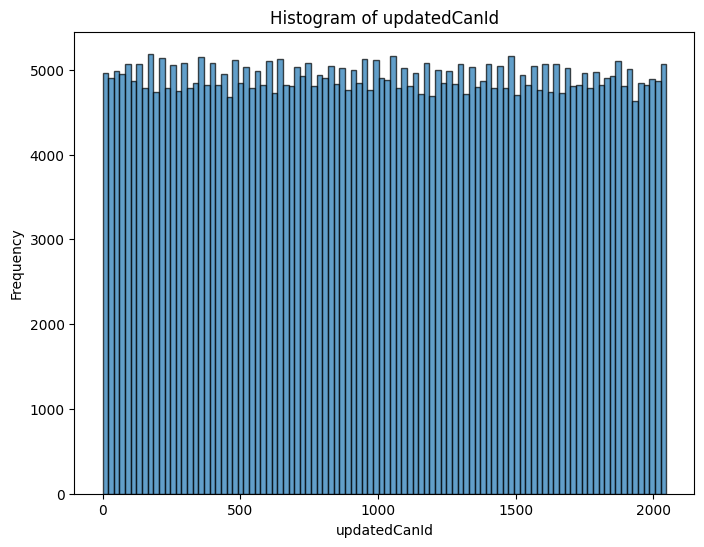

In [54]:
plot_hist(fuzzy_df, "updatedCanId",100)

In [55]:
attack_free_df["updatedCanId"].nunique()


38

In [56]:
# plot_count_chart(attack_free_df,"updatedCanId")

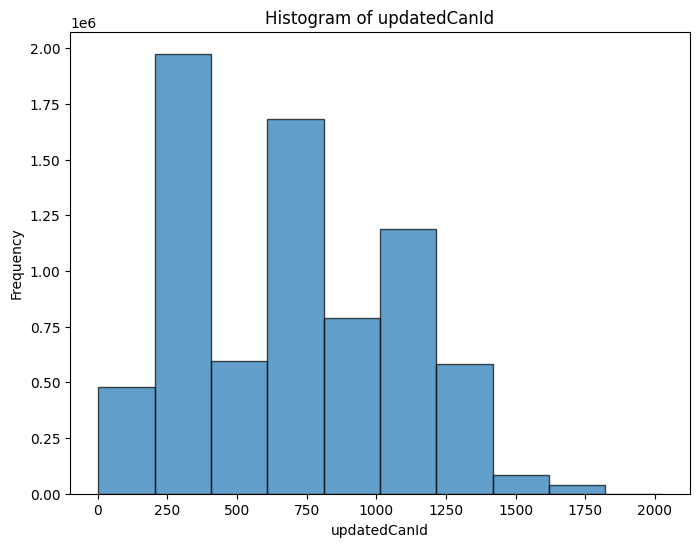

In [57]:
plot_hist(attack_free_df, "updatedCanId",10)

#### dlc

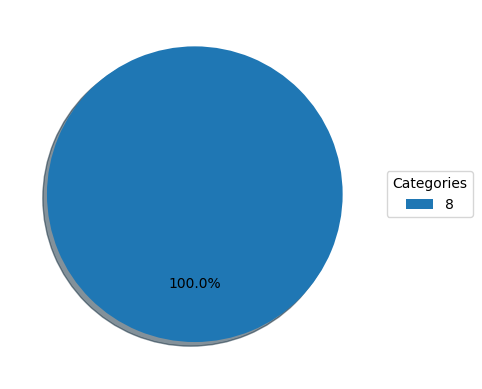

In [58]:
plot_pie_chart(dos_df,"dlc")

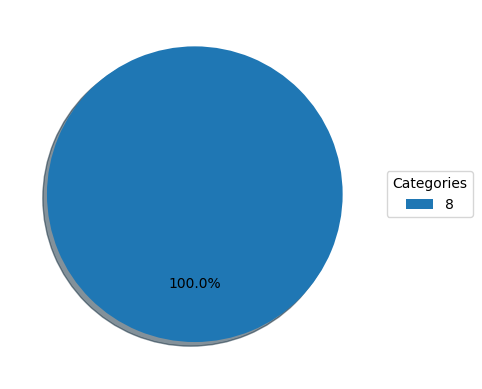

In [59]:
plot_pie_chart(fuzzy_df,"dlc")

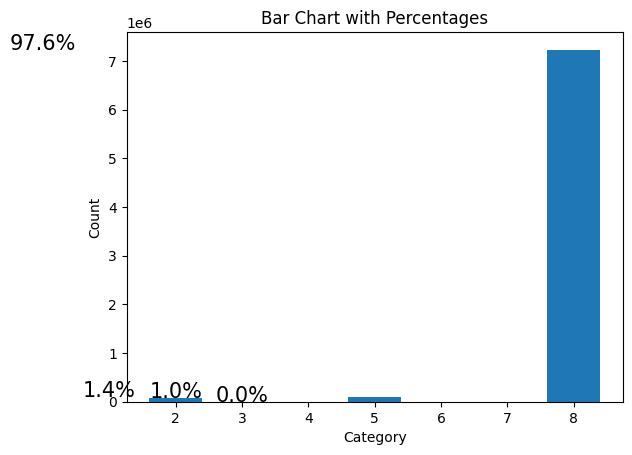

In [60]:
plot_bar_chart_of_percentages(attack_free_df,"dlc")

In [61]:
attack_free_df["dlc"].value_counts()

dlc
8    7234373
5     104057
2      75699
6          3
Name: count, dtype: int64

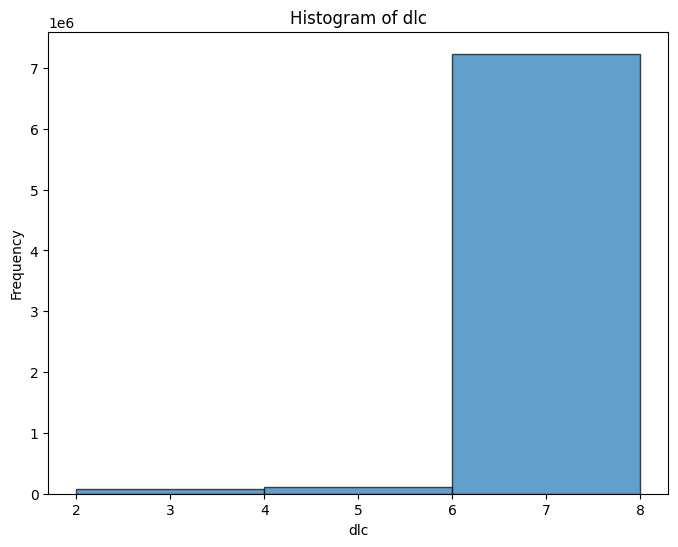

In [62]:
plot_hist(attack_free_df, "dlc",3)

#### updatedFlag

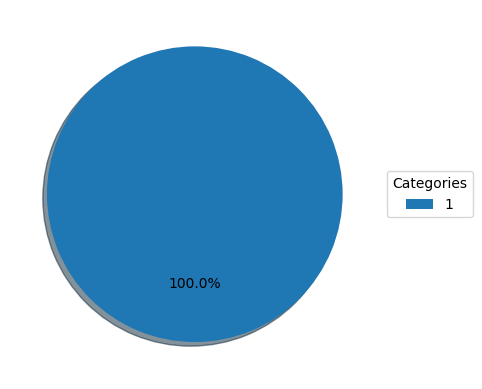

In [63]:
plot_pie_chart(dos_df,"updatedFlag")

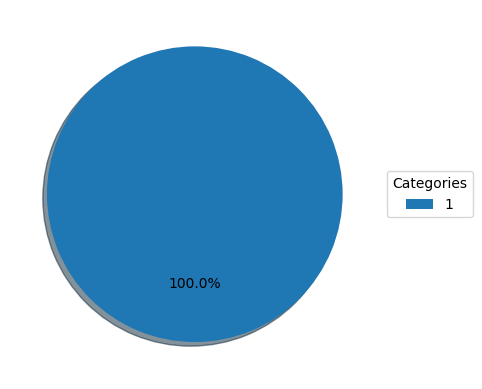

In [64]:
plot_pie_chart(fuzzy_df,"updatedFlag")

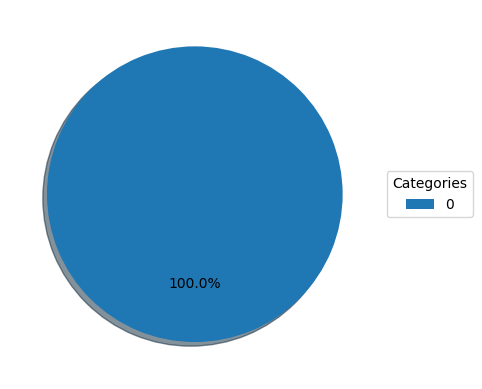

In [65]:
plot_pie_chart(attack_free_df,"updatedFlag")

### Insights about Univariate Analysis


#### **Shape**
- **DOS Dataset:** Shape is `(587,521, 6)`  
- **Fuzzy Dataset:** Shape is `(491,847, 6)`  
- **Attack-Free Dataset:** Shape is `(7,414,132, 6)`  

#### **Updated CAN ID**
- **DOS Dataset:** Contains only a single value: `0`.  
- **Fuzzy Dataset:** 
  - Contains **2,048 unique IDs** ranging between `0` and `2,047`.  
  - Observing the top 100 most used IDs reveals a **uniform distribution**.  
- **Attack-Free Dataset:** 
  - Contains **38 unique IDs** with a **non-normal distribution**.  
  - This dataset appears to be a **combination of multiple sources**, as it includes attack-free samples from the DOS, Fuzzy, and original attack-free datasets.  

#### **DLC (Data Length Code)**
- **DOS Dataset:** Limited to **8 as unique value**.  
- **Fuzzy Dataset:** Limited to **8 as unique value**.  
- **Attack-Free Dataset:** Includes values such as **2, 5, 6, and 8**, but values other than `8` are **extremely rare**. These may be removed during data cleaning for simplification.  

#### **Updated Flag**
- **DOS Dataset:** All values are labeled as `injected`.  
- **Fuzzy Dataset:** All values are labeled as `injected`.  
- **Attack-Free Dataset:** All values are labeled as `normal`.  
